In [1]:
import numpy as np
import matplotlib.pyplot as plt

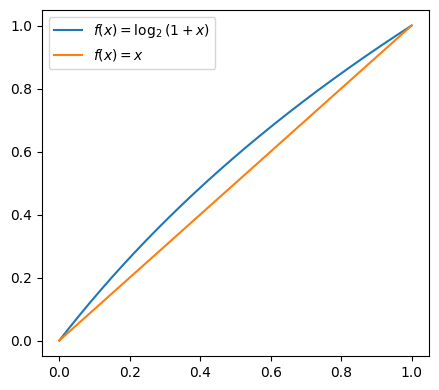

In [2]:
# Approximation of log_2(1+x)

def exact_log(x):
    return np.log2(1+x)

def approx_log(x):
    return x

x = np.linspace(0, 1, 1000)
exact = exact_log(x)
approx = approx_log(x)

plt.figure(figsize=(5,4.5))
plt.plot(x, exact, label='$f(x) = \log_2(1+x)$')
plt.plot(x, approx, label='$f(x) = x$')

plt.legend()
plt.show()

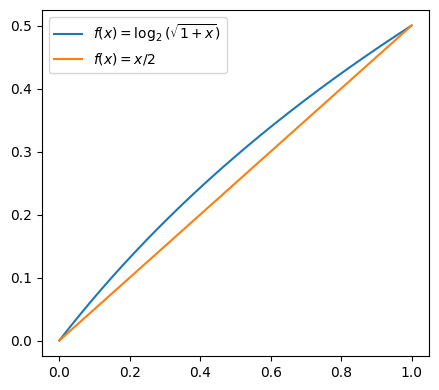

In [6]:
# Approximation of log_2(sqrt(1+x))

def exact_log(x):
    return np.log2(np.sqrt(1+x))

def approx_log(x):
    return x/2

x = np.linspace(0, 1, 1000)
exact = exact_log(x)
approx = approx_log(x)

plt.figure(figsize=(5,4.5))
plt.plot(x, exact, label='$f(x) = \log_2(\sqrt{1+x})$')
plt.plot(x, approx, label='$f(x) = x/2$')

plt.legend()
plt.show()

# Approximate Logarithmic Multiplication (ALM)

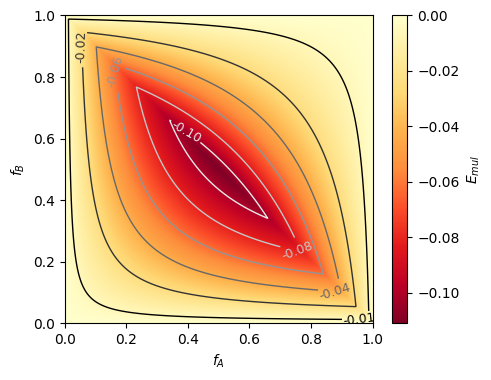

-0.1111111111111111 -0.038411088504113615 0.0 0.029400158002293744


In [3]:
def exact_mul(a, b):
    return (1+a) * (1+b)

def approx_mul(a, b):
    return np.where(a + b < 1, 
                (1 + a + b), 
                2*(a + b)
            )
    # if a + b < 1:
    #     return (1 + a + b)
    # else:
    #     return 2*(a + b)

def error_mul(a, b):
    # return np.abs((approx_mul(a, b) - exact_mul(a, b))/exact_mul(a, b))
    return ((approx_mul(a, b) - exact_mul(a, b))/exact_mul(a, b))


# Plot
N=1000
x = np.linspace(0, 1, N+1)
y = np.linspace(0, 1, N+1)

X, Y = np.meshgrid(x, y)
Z = error_mul(X, Y)

# plt.figure(figsize=(5,4))
# c = plt.contourf(X, Y, Z) # , levels=5
# plt.colorbar(c)
# plt.show()

plt.figure(figsize=(5,4))

im = plt.imshow(Z, cmap=plt.cm.YlOrRd_r,
                extent=[0,1,0,1], origin='lower',
                # vmin=-0.112, vmax=0.125
                )
plt.xlim(0,1)
plt.ylim(0,1)
# cset = plt.contour(Z, np.arange(0.01,0.12,0.019),
cset = plt.contour(Z, np.arange(-0.12,-0.005,0.019),
                linewidths=1, cmap=plt.cm.Greys,
                extent=[0,1,0,1]
                )
plt.clabel(cset,inline=True,fmt='%1.2f',fontsize=9)

plt.colorbar(im, label="$E_{mul}$") # adding the colobar on the right
plt.xlabel('$f_A$')
plt.ylabel('$f_B$')

plt.savefig("error_mul.pdf",
            bbox_inches="tight",
            )
plt.show()

print(Z.min(), Z.mean(), Z.max(), Z.std())

# Approximate Logarithmic Division (ALD)

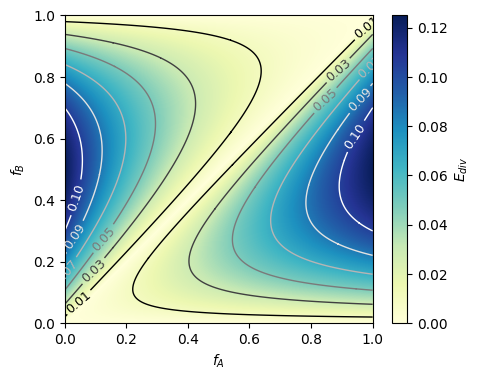

-2.2160140212078972e-16 0.04101925026019807 0.12500000000000006 0.0324384795167614


In [4]:
def exact_div(a, b):
    return (1+a) / (1+b)

def approx_div(a, b):
    return np.where(a - b >= 0, 
                (1 + a - b), 
                (2 + a - b)/2
            )
    # if a - b >= 0:
    #     return (1 + a - b)
    # else:
    #     return (2 + a - b)/2

def error_div(a, b):
    # return np.abs((approx_div(a, b) - exact_div(a, b))/exact_div(a, b))
    return ((approx_div(a, b) - exact_div(a, b))/exact_div(a, b))


# Plot
N=1000
x = np.linspace(0, 1, N+1)
y = np.linspace(0, 1, N+1)

X, Y = np.meshgrid(x, y)
Z = error_div(X, Y)

# plt.figure(figsize=(5,4))
# c = plt.contourf(X, Y, Z) # , levels=5
# plt.colorbar(c)
# plt.show()

plt.figure(figsize=(5,4))

im = plt.imshow(Z, cmap=plt.cm.YlGnBu, 
                extent=[0,1,0,1], origin='lower',
                # vmin=-0.112, vmax=0.125
                )
plt.xlim(0,1)
plt.ylim(0,1)
cset = plt.contour(Z, np.arange(0.01,0.12,0.019),
                linewidths=1, cmap=plt.cm.Greys_r,
                extent=[0,1,0,1]
                )
plt.clabel(cset,inline=True,fmt='%1.2f',fontsize=9)

plt.colorbar(im, label="$E_{div}$") # adding the colobar on the right
plt.xlabel('$f_A$')
plt.ylabel('$f_B$')

plt.savefig("error_div.pdf",
            bbox_inches="tight",
            )
plt.show()

print(Z.min(), Z.mean(), Z.max(), Z.std())

# Approximate Logarithmic Square Root (ALST)

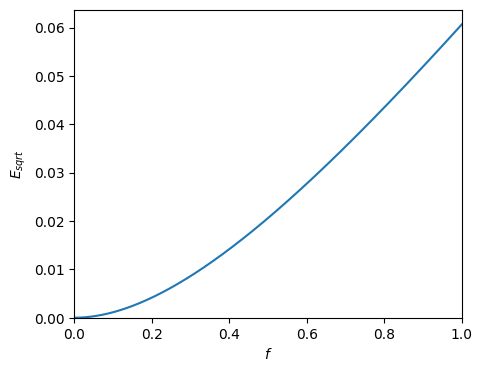

0.0 0.02369591216124841 0.06066017177982121 0.018646425383400653


In [5]:
def exact_sqrt(a):
    return np.sqrt(1+a)

def approx_sqrt(a):
    return (1+a/2)

def error_sqrt(a):
    # return ((approx_sqrt(a) - exact_sqrt(a))/exact_sqrt(a))
    return np.abs((approx_sqrt(a) - exact_sqrt(a))/exact_sqrt(a))


# Plot
N=1000
x = np.linspace(0, 1, N+1)

# X, Y = np.meshgrid(x,y)
Z = error_sqrt(x)

plt.figure(figsize=(5,4))
# c = plt.contourf(X, Y, Z) # , levels=5
c = plt.plot(x, Z) # , levels=5
# plt.colorbar(c)
plt.xlim(0,1)
plt.ylim(bottom=0,)
plt.xlabel('$f$')
plt.ylabel('$E_{sqrt}$')

plt.savefig("error_sqrt.pdf",
            bbox_inches="tight",
            )
plt.show()

print(Z.min(), Z.mean(), Z.max(), Z.std())